In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop,SGD,Adam,Adadelta
#opt = rmsprop(lr=0.0001, decay=1e-6)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
import os
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers.merge import concatenate
from sklearn import metrics
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def build_model(pretrained,init):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512,kernel_initializer=init, activation="sigmoid"),
        layers.Dense(256,kernel_initializer=init, activation="sigmoid"),
        layers.Dense(128,kernel_initializer=init, activation="sigmoid"),
        layers.Dense(64,kernel_initializer=init, activation="sigmoid"),
        layers.Dense(32,kernel_initializer=init, activation="sigmoid"),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

densenet = DenseNet121(
    weights=None,
    include_top=False,
    input_shape=(160,160,1)
)
init="he_normal"
classifier = build_model(densenet,init)
"""
init='he_normal'
model.add(Dense(128, kernel_initializer=init, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=init, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer=init, activation="sigmoid"))
model.add(Dropout(0.2))
"""
classifier.summary() 
classifier.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

data_generator = ImageDataGenerator(rescale=1./255.,
                               shear_range=0.15,
                               zoom_range=0.15,
                               featurewise_center=False,
                               samplewise_center=False,
                               featurewise_std_normalization=False,
                               samplewise_std_normalization=False,
                               zca_whitening=False,
                               zca_epsilon=1e-06,
                               rotation_range=0,
                               width_shift_range=0.0,
                               height_shift_range=0.0,
                               brightness_range=None,
                               channel_shift_range=0.0,                             
                               cval=0.0,
                               horizontal_flip=False,
                               preprocessing_function=None,
                               data_format=None,
                               validation_split=0.0)
batch_size = 32
Training_dDtas = data_generator.flow_from_directory(
    '/content/drive/My Drive/large_dataset(160)/Training',
     target_size=(160,160),
     batch_size=batch_size,
     color_mode='grayscale',
     shuffle = True,
     class_mode='binary'
)

Test_Datas = data_generator.flow_from_directory(
    '/content/drive/My Drive/large_dataset(160)/Val',
    target_size=(160,160),
    batch_size=1,
    color_mode='grayscale',
    shuffle = False,
    class_mode='binary'
)

Validation_Datas = data_generator.flow_from_directory(
    '/content/drive/My Drive/large_dataset(160)/Testing',
    target_size = (160, 160),
    batch_size = batch_size,
    color_mode='grayscale',
    shuffle = True,
    class_mode ='binary'
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 5, 5, 1024)        7031232   
                                                                 
 global_average_pooling2d_12  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_72 (Dense)            (None, 512)               524800    
                                                                 
 dense_73 (Dense)            (None, 256)               131328    
                                                                 
 dense_74 (Dense)            (None, 128)               32896     
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                     

In [ ]:
Train_steps = 5302 //64
Validation_steps = 1304 //64

history = classifier.fit(
    Training_Datas,
    epochs = 30,
    steps_per_epoch =Train_steps,
    validation_data =Validation_Datas,
    validation_steps = Validation_steps
)
model.save("custom_model.h5")

Epoch 1/30
82/82 [==============================] - 30s 236ms/step - loss: 0.5683 - accuracy: 0.7191 - val_loss: 0.6672 - val_accuracy: 0.6493
Epoch 2/30
82/82 [==============================] - 18s 214ms/step - loss: 0.4470 - accuracy: 0.7158 - val_loss: 0.6982 - val_accuracy: 0.6667
Epoch 3/30
82/82 [==============================] - 18s 219ms/step - loss: 0.3390 - accuracy: 0.9159 - val_loss: 0.6604 - val_accuracy: 0.7153
Epoch 4/30
82/82 [==============================] - 18s 218ms/step - loss: 0.2741 - accuracy: 0.9607 - val_loss: 0.7427 - val_accuracy: 0.6944
Epoch 5/30
82/82 [==============================] - 17s 210ms/step - loss: 0.2379 - accuracy: 0.9591 - val_loss: 0.7868 - val_accuracy: 0.6944
Epoch 6/30
82/82 [==============================] - 17s 212ms/step - loss: 0.2130 - accuracy: 0.9610 - val_loss: 0.7782 - val_accuracy: 0.4826
Epoch 7/30
82/82 [==============================] - 17s 212ms/step - loss: 0.1893 - accuracy: 0.9664 - val_loss: 0.5847 - val_accuracy: 0.7986

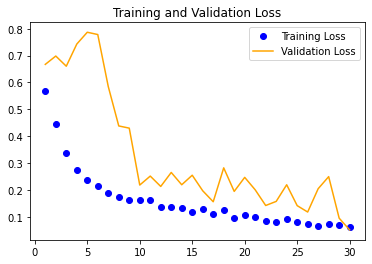

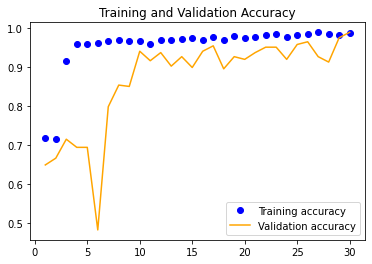

In [ ]:

def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)


In [ ]:
def create_test_data(dir,n):
    test_datas = []
    for img in tqdm(os.listdir(dir)):
        label = n
        path = os.path.join(dir,img)
        #img = cv2.imread(path)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #test_datas.append([np.array(img),np.array(label)])
        test_datas.append(np.asarray(img).astype('float32'))
        
    np.save('test_datas.npy', test_datas)
    return test_datas

test_data_n = create_test_data('/content/drive/My Drive/large_dataset(160)/Val/no',0.0)
test_data_y = create_test_data('/content/drive/My Drive/large_dataset(160)/Val/yes',1.0)

#x = np.hsplit(test_data_y)
#y = np.hsplit(test_data_n)
new_test_datas1 = np.concatenate((test_data_n, test_data_y), axis=0)
#new_test_datas = np.concatenate((test_data_y, test_data_n), axis=0)
new_test_datas = tf.convert_to_tensor(new_test_datas1)
#new_test_datas_l=concatenate(x[1],y[1])
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

y_pred = classifier.predict(Test_Datas)
#print(y_pred)
y_test = Test_Datas.classes
y_pred=np.round_(y_pred)

accuracy1=sum(y_pred.flatten()==Test_Datas.classes)/len(Test_Datas.classes)
print("accuracy without MC droupout " + str(accuracy1))
#print(type(Test_Datas[1][1][0]))
#print(y_pred.flatten())
#print(Test_Datas.classes)


y_samples = np.stack([classifier(new_test_datas,training=True) for sample in range(10)])
y_samples_mean = y_samples.mean(axis=0)
y_samples_std = y_samples.std(axis=0)
#print(f'Mean = {np.round(y_samples_mean[:1],2)}')
#print(f'Std  = {np.round(y_samples_std[:1],2)}')


y_pred=np.round_(y_samples_mean)
#print(y_pred.flatten())
accuracy=sum(y_pred.flatten()==Test_Datas.classes)/len(Test_Datas.classes)
print("accuray is " + str(accuracy))


print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))



100%|██████████| 470/470 [00:00<00:00, 485.40it/s]


accuracy without MC droupout 0.9859375
accuray is 0.9875
ROC AUC Score: 0.9914893617021276
AP Score: 0.9954787234042554

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       170
           1       1.00      0.98      0.99       470

    accuracy                           0.99       640
   macro avg       0.98      0.99      0.98       640
weighted avg       0.99      0.99      0.99       640

